In [6]:
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
from matplotlib import colors
import pickle
from glob import glob
from pprint import pprint
from tqdm import tqdm
from astropy import units as u
from speclite import filters

from mejiro.instruments.jwst import JWST
from mejiro.utils import util

%matplotlib inline

In [12]:
# read the JWST throughput txt and save as ECSV using speclite
text_files = sorted(glob('/grad/bwedig/mejiro/mejiro/data/jwst_filter_response/*.txt'))

for txt_path in text_files:
    data = np.genfromtxt(txt_path)
    if data.ndim == 1 and data.size >= 2:
        data = data.reshape(-1, 2)

    wavelengths = data[:, 0]
    responses = data[:, 1]

    wavelengths_ang = wavelengths * 1e4  # micron -> Angstrom

    jwst_filter_response = filters.FilterResponse(
        wavelength=wavelengths_ang * u.Angstrom,
        response=responses,
        meta=dict(group_name='NIRCam', band_name=os.path.basename(txt_path).split('_')[0])
    )

    saved_path = jwst_filter_response.save('/grad/bwedig/mejiro/mejiro/data/jwst_filter_response')
    print(f'Saved ECSV: {saved_path}')

Saved ECSV: /grad/bwedig/mejiro/mejiro/data/jwst_filter_response/NIRCam-F115W.ecsv
Saved ECSV: /grad/bwedig/mejiro/mejiro/data/jwst_filter_response/NIRCam-F150W.ecsv
Saved ECSV: /grad/bwedig/mejiro/mejiro/data/jwst_filter_response/NIRCam-F200W.ecsv
Saved ECSV: /grad/bwedig/mejiro/mejiro/data/jwst_filter_response/NIRCam-F277W.ecsv
Saved ECSV: /grad/bwedig/mejiro/mejiro/data/jwst_filter_response/NIRCam-F356W.ecsv
Saved ECSV: /grad/bwedig/mejiro/mejiro/data/jwst_filter_response/NIRCam-F444W.ecsv


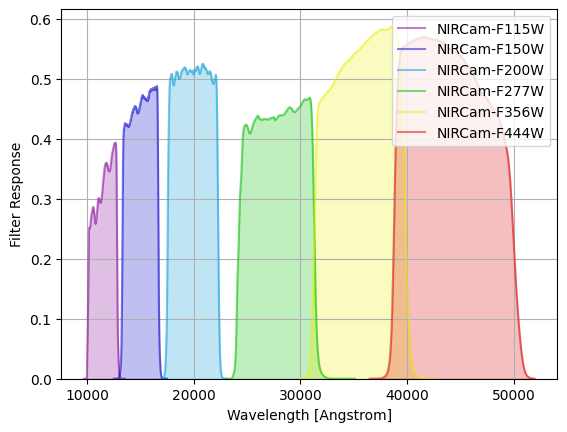

In [13]:
speclite_filters = JWST.load_speclite_filters()

filters.plot_filters(speclite_filters)